<a href="https://colab.research.google.com/github/mirodil1/Flight-Price-Prediction/blob/main/pneumonia_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from fastai.vision.all import *
from ipywidgets import widgets

# path
path = Path("train")
fls = get_image_files(path)

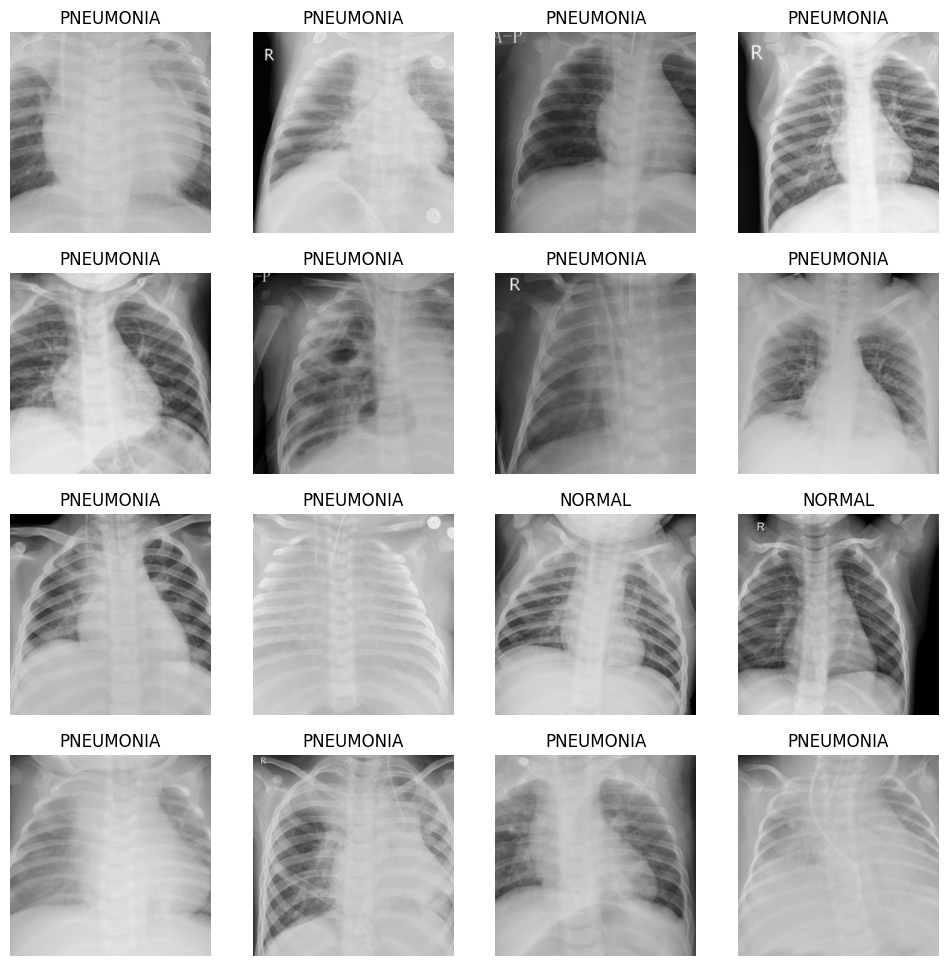

In [39]:
# Create datablock
transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms=Resize(224)
)

# Create Dataloaders
dls = transports.dataloaders(path)
dls.train.show_batch(max_n=16, nrows=4)

In [41]:
# Training
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,0.479954,0.223052,0.934803,01:57


epoch,train_loss,valid_loss,accuracy,time
0,0.149855,0.202934,0.969319,01:56
1,0.080308,0.146214,0.974113,01:54
2,0.058010,0.059299,0.984660,01:54
3,0.026622,0.062775,0.986577,01:56


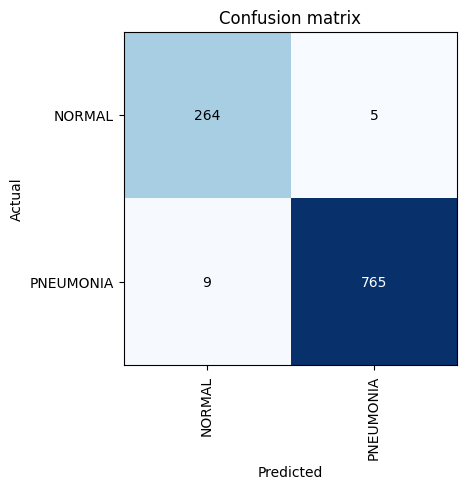

In [42]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

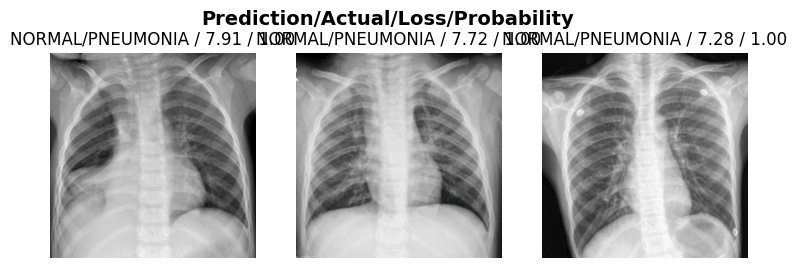

In [45]:
interp.plot_top_losses(3, nrows=1)

In [46]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction: PNEUMONIA
Probabilty: 100.0%


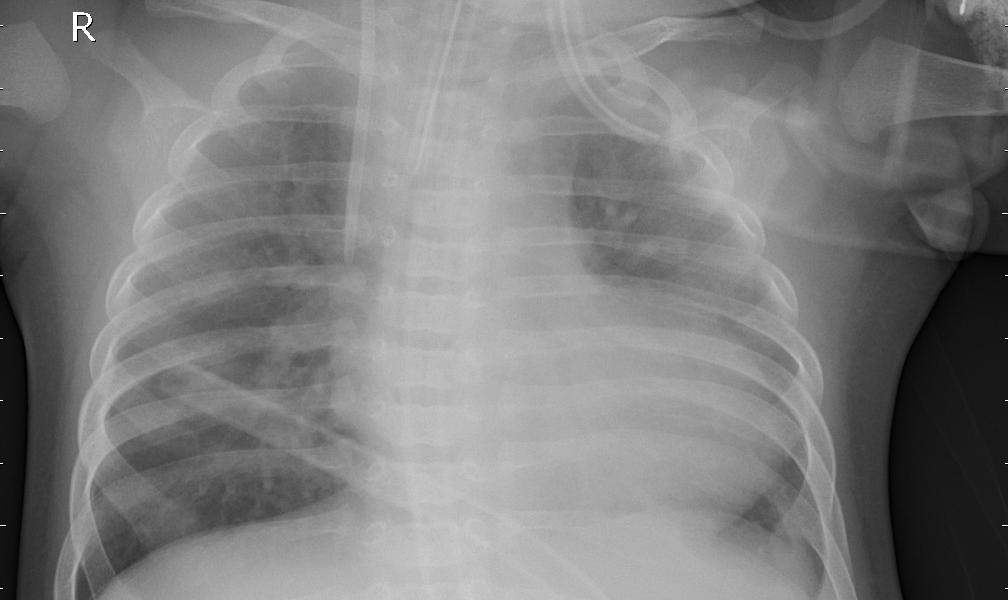

In [50]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"Prediction: {pred}")
print(f"Probabilty: {probs[pred_id]*100:.1f}%")
img